In [ ]:
from datasets import load_dataset

# Load the Rotten Tomatoes dataset
dataset = load_dataset("rotten_tomatoes")

# Print the dataset information
print(dataset)

# Example: Accessing the training split
train_dataset = dataset["train"]

# Print the first example in the training set
print(train_dataset[0]['text'])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})
the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .


In [ ]:
!pip install transformers[torch]

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
print(train_dataset[100]['text'])

train_prediction = []
for i in range(1000):
 # print(train_dataset[i]['text'])
  prediction = classifier(train_dataset[i]['text'], )
 # print(prediction)
  train_prediction.append(prediction)


for i in range(10):
  print(train_dataset[i]['text'])
  print(train_prediction[i])




Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

chicago is sophisticated , brash , sardonic , completely joyful in its execution .
the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .
[{'label': 'joy', 'score': 0.9911354780197144}]
the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth .
[{'label': 'joy', 'score': 0.978663444519043}]
effective but too-tepid biopic
[{'label': 'joy', 'score': 0.985716700553894}]
if you sometimes like to go to the movies to have fun , wasabi is a good place to start .
[{'label': 'joy', 'score': 0.9979835748672485}]
emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .
[{'label': 'joy', 'score': 0.9979433417320251}]
the film provides some great insight into

"\nOutput:\n[[\n{'label': 'sadness', 'score': 0.0006792712374590337},\n{'label': 'joy', 'score': 0.9959300756454468},\n{'label': 'love', 'score': 0.0009452480007894337},\n{'label': 'anger', 'score': 0.0018055217806249857},\n{'label': 'fear', 'score': 0.00041110432357527316},\n{'label': 'surprise', 'score': 0.0002288572577526793}\n]]\n"

In [ ]:
from collections import Counter

# Extract all predicted labels
all_predicted_labels = []
for prediction_list in train_prediction:
    # Each prediction_list is like [{'label': 'joy', 'score': 0.99}]
    dominant_emotion = prediction_list[0]['label']
    all_predicted_labels.append(dominant_emotion)

# Count the occurrences of each label
label_distribution = Counter(all_predicted_labels)

print("Distribution of Predicted Labels:")
for label, count in label_distribution.items():
    print(f"- {label}: {count}")

Distribution of Predicted Labels:
- joy: 703
- fear: 46
- anger: 124
- love: 44
- surprise: 42
- sadness: 41


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for sentiment labels
conf_matrix = confusion_matrix(true_sentiment_labels, predicted_sentiment_labels)

print("Confusion Matrix for Sentiment Classification:")
print(conf_matrix)

Confusion Matrix for Sentiment Classification:
[[  0   0]
 [211 789]]


In [ ]:
true_sentiment_labels = []
predicted_sentiment_labels = []

# Define emotion to sentiment mapping
positive_emotions = ['joy', 'love', 'surprise']
negative_emotions = ['sadness', 'anger', 'fear']

for i in range(1000):
    # Extract true label
    true_label = train_dataset[i]['label']
    true_sentiment_labels.append(true_label)

    # Get the single prediction dictionary for the current review
    # Based on previous cell output, train_prediction[i] is a list like [{'label': 'emotion', 'score': X.XX}]
    # So, train_prediction[i][0] directly gives the dictionary containing the dominant emotion.
    prediction_dict = train_prediction[i][0]

    # The dominant emotion is directly available in this dictionary
    dominant_emotion = prediction_dict['label']

    # Map dominant emotion to sentiment (0 or 1)
    mapped_sentiment = None
    if dominant_emotion in positive_emotions:
        mapped_sentiment = 1
    elif dominant_emotion in negative_emotions:
        mapped_sentiment = 0
    # No 'else' needed here, as all model emotions should fall into one of these categories.

    predicted_sentiment_labels.append(mapped_sentiment)

print(f"First 10 true sentiment labels: {true_sentiment_labels[:10]}")
print(f"First 10 predicted sentiment labels: {predicted_sentiment_labels[:10]}")

First 10 true sentiment labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
First 10 predicted sentiment labels: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


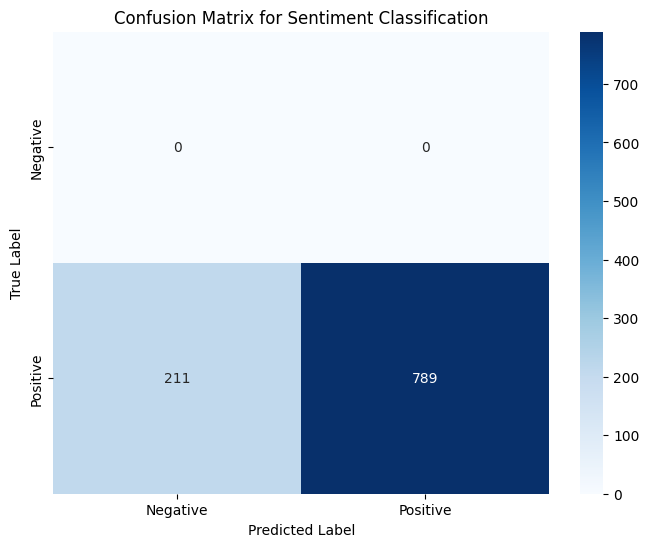

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Sentiment Classification')
plt.show()

The confusion matrix clearly highlights that the model, when mapping emotions to sentiment, never predicted a negative sentiment when the true label was negative (because there were no true negatives in this subset). However, it did misclassify 211 of the actually positive reviews as negative.